In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta*coef*alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    
    
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()
    
def result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    # обучение
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    # вывод результатов
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    # вывод графика
    get_error_plot(n_trees, train_errors, test_errors)
    

### Задание 1

    - Для реализованной в методичке модели градиентного бустинга построить зависимости ошибки от количества деревьев при разных значениях шага градиента на одном графике и для разной глубины деревьев на другом. 
    - Сделать выводы о зависимости ошибки от этих гиперпараметров (шаг градиента, максимальная глубина деревьев, количество деревьев). 
    - Подобрать оптимальные значения этих гиперпараметров (минимум ошибки на тесте при отсутствии переобучения).

#### Решение

In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


Ошибка алгоритма из 3 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 3453.4969074738224
Ошибка алгоритма из 3 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3915.295756532136


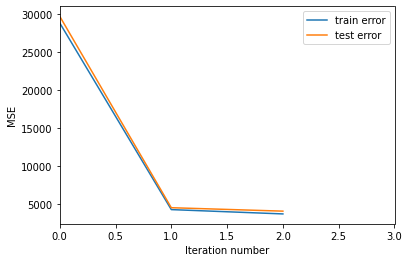

In [3]:
n_trees = 3
coefs = [1] * n_trees
max_depth = 1
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 9 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 2967.0271926765727
Ошибка алгоритма из 9 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3390.080860852445


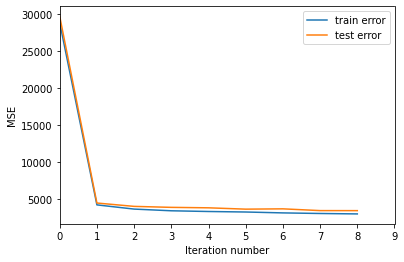

In [4]:
n_trees = 9
coefs = [1] * n_trees
max_depth = 1
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 2917.1103914991663
Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 1 на тестовой выборке: 3324.3866688150697


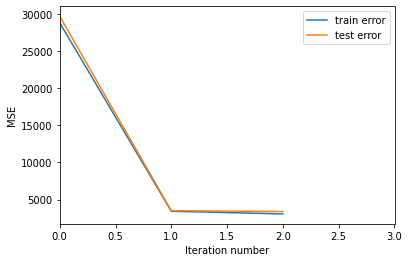

In [5]:
n_trees = 3
coefs = [1] * n_trees
max_depth = 2
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 9 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 2070.4706696219405
Ошибка алгоритма из 9 деревьев глубиной 2     с шагом 1 на тестовой выборке: 3777.866825558366


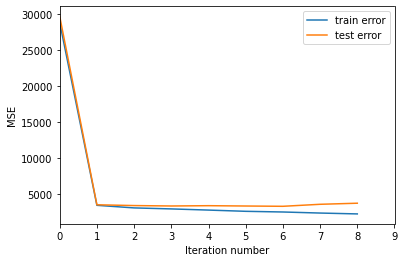

In [6]:
n_trees = 9
coefs = [1] * n_trees
max_depth = 2
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 0.5 на тренировочной выборке: 3374.9540103023924
Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 0.5 на тестовой выборке: 3778.965680594988


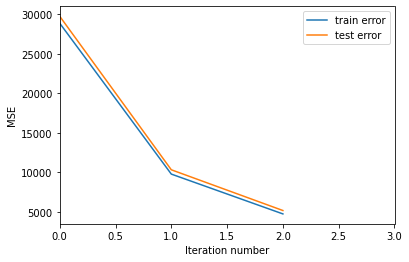

In [7]:
n_trees = 3
coefs = [1] * n_trees
max_depth = 2
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 9 деревьев глубиной 2     с шагом 0.5 на тренировочной выборке: 2299.0001832382213
Ошибка алгоритма из 9 деревьев глубиной 2     с шагом 0.5 на тестовой выборке: 2959.7407837840065


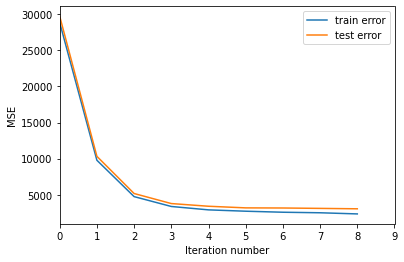

In [8]:
n_trees = 9
coefs = [1] * n_trees
max_depth = 2
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 1519.6581434800785
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 3182.551874083213


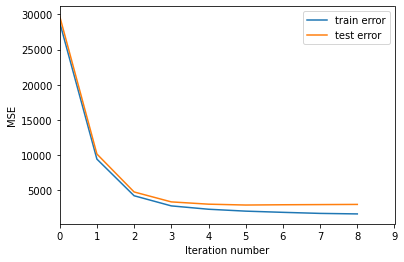

In [9]:
n_trees = 9
coefs = [1] * n_trees
max_depth = 3
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 4 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 2313.566816592742
Ошибка алгоритма из 4 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 3033.4810620333137


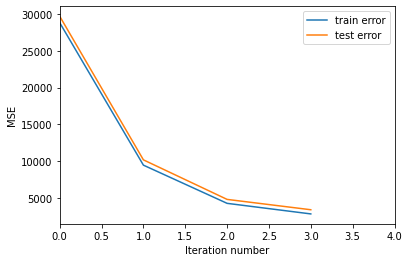

In [10]:
n_trees = 4
coefs = [1] * n_trees
max_depth = 3
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Вывод:
Ориентировочные оптимальные параметры в нашем случае из анализа данных можно определить как

n_trees = 3

max_depth = 3

eta = 5e-1

### Задание 2

(\*) Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5.    Сравнить на одном графике кривые  изменения ошибки на тестовой выборке в зависимости от  числа итераций.

#### Решение

In [11]:
def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    trees = []
    
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        #Формирование подвыборки    
        ind = [i for i in range(len(X_train))]
        np.random.shuffle(ind) 
        index_sample = ind[0:len(ind)//2] # размер подвыборки = 0.5
        
        X_train_2 = np.zeros((len(index_sample), X_train.shape[1]))
        y_train_2 = np.zeros((len(index_sample)))
        
        k = 0
        for i in index_sample:
            X_train_2[k, :] = X_train[i, :]
            y_train_2[k] = y_train[i]
            k += 1

        if len(trees) == 0:

            tree.fit(X_train_2, y_train_2)
            
            train_errors.append(mean_squared_error(y_train_2, gb_predict(X_train_2, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:

            target = gb_predict(X_train_2, trees, coefs, eta)
            
            tree.fit(X_train_2, bias(y_train_2, target))
            
            train_errors.append(mean_squared_error(y_train_2, gb_predict(X_train_2, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.title(f'Stochastic Gradient Boosting on {n_trees} trees')
    plt.legend(loc='upper right')
    plt.show()

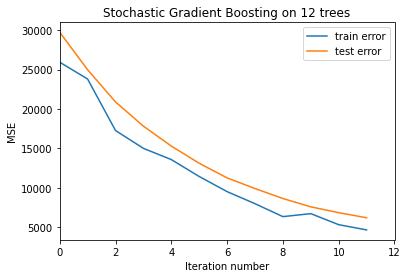

In [12]:
n_trees = 12
coefs = [1] * n_trees
max_depth = 5
eta = 0.1

trees, train_errors, test_errors = sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Кривая тестовых данных в случае стохастического градиентного бустинга получается более плавная, чем при градиентном бустинге, кривая тренировочных данных - более дерганой